In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

## Load Cleaned DataFrames

In [2]:
taxa_path = '../data/processed/taxa_cleaned.csv'
taxa_df = pd.read_csv(taxa_path, index_col=0)
taxa_df

,dataset_name,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii|t__Methanobrevibacter_smithii_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Candela_Africa.1,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Candela_Africa.2,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Candela_Africa.3,0.40133,0.40133,0.40133,0.40133,0.40133,0.35994,0.35994,0.35994,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Candela_Africa.4,0.17479,0.17479,0.17479,0.17479,0.17479,0.16331,0.15280,0.15280,0.01051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,Zeller_fecal_colorectal_cancer.129,6.59835,6.59835,6.59835,6.59835,6.59835,6.59835,6.59835,6.59835,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,Zeller_fecal_colorectal_cancer.130,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,Zeller_fecal_colorectal_cancer.131,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,Zeller_fecal_colorectal_cancer.132,0.17495,0.17495,0.17495,0.17495,0.17495,0.17495,0.16890,0.16890,0.00605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
meta_path = '../data/processed/metadata_cleaned.csv'
metadata_df = pd.read_csv(meta_path, index_col=0)
metadata_df

,dataset_name,sampleID,subjectID,disease,age,gender,country
0,Candela_Africa,H10,h10,normal,40.0,female,tanzania
1,Candela_Africa.1,H11,h11,normal,29.0,female,tanzania
2,Candela_Africa.2,H12,h12,normal,8.0,female,tanzania
3,Candela_Africa.3,H13,h13,normal,34.0,male,tanzania
4,Candela_Africa.4,H14,h14,normal,30.0,male,tanzania
...,...,...,...,...,...,...,...
1984,Zeller_fecal_colorectal_cancer.129,CCIS95409808ST-4-0,fr-152,normal,63.0,female,france
1985,Zeller_fecal_colorectal_cancer.130,CCIS96387239ST-4-0,fr-626,small_adenoma,66.0,male,france
1986,Zeller_fecal_colorectal_cancer.131,CCIS98482370ST-3-0,fr-052,normal,53.0,female,france
1987,Zeller_fecal_colorectal_cancer.132,CCIS98512455ST-4-0,fr-459,cancer,63.0,male,france


## Disease Label Distribution 

Text(0, 0.5, '')

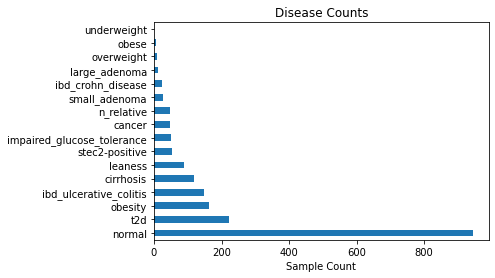

In [4]:
metadata_df['disease'].value_counts().plot(kind='barh')
plt.title('Disease Counts')
plt.xlabel('Sample Count')
plt.ylabel('')

**Why focus on T2D vs. Normal?**

I choose to explore Type 2 Diabetes (T2D) vs Normal classification for two key reasons:

__(1) Sufficient sample size:__
T2D is the most common disease label after "normal" in this dataset, with >200 samples—enough to support a robust binary classification task.

__(2) Clinical and commercial relevance:__
T2D is a globally prevalent, chronic disease with rising incidence and significant implications for public health and healthcare costs. The growing diabetes therapeutics market makes this a high-impact application area for microbiome-based diagnostics.

## T2D vs non-T2D Label Creation

In [5]:
metadata_df['t2d_label'] = metadata_df['disease'].apply(lambda x: 't2d' if x == 't2d' else 'non_t2d')
metadata_df['t2d_label'].value_counts()

t2d_label
non_t2d    1739
t2d         223
Name: count, dtype: int64

## Merge Taxa with Metadata

In [6]:
print(taxa_df.shape, metadata_df.shape)

(1989, 2129) (1962, 8)


In [7]:
df = pd.merge(taxa_df, metadata_df, on='dataset_name', how='inner')
df

,dataset_name,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii|t__Methanobrevibacter_smithii_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,...,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965,sampleID,subjectID,disease,age,gender,country,t2d_label
0,Candela_Africa,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.00000,...,0.0,0.0,0.0,H10,h10,normal,40.0,female,tanzania,non_t2d
1,Candela_Africa.1,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.00000,...,0.0,0.0,0.0,H11,h11,normal,29.0,female,tanzania,non_t2d
2,Candela_Africa.2,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.00000,...,0.0,0.0,0.0,H12,h12,normal,8.0,female,tanzania,non_t2d
3,Candela_Africa.3,0.40133,0.40133,0.40133,0.40133,0.40133,0.35994,0.35994,0.35994,0.00000,...,0.0,0.0,0.0,H13,h13,normal,34.0,male,tanzania,non_t2d
4,Candela_Africa.4,0.17479,0.17479,0.17479,0.17479,0.17479,0.16331,0.15280,0.15280,0.01051,...,0.0,0.0,0.0,H14,h14,normal,30.0,male,tanzania,non_t2d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,Zeller_fecal_colorectal_cancer.129,6.59835,6.59835,6.59835,6.59835,6.59835,6.59835,6.59835,6.59835,0.00000,...,0.0,0.0,0.0,CCIS95409808ST-4-0,fr-152,normal,63.0,female,france,non_t2d
1958,Zeller_fecal_colorectal_cancer.130,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,CCIS96387239ST-4-0,fr-626,small_adenoma,66.0,male,france,non_t2d
1959,Zeller_fecal_colorectal_cancer.131,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,CCIS98482370ST-3-0,fr-052,normal,53.0,female,france,non_t2d
1960,Zeller_fecal_colorectal_cancer.132,0.17495,0.17495,0.17495,0.17495,0.17495,0.17495,0.16890,0.16890,0.00605,...,0.0,0.0,0.0,CCIS98512455ST-4-0,fr-459,cancer,63.0,male,france,non_t2d


In [28]:
import os

# ensure the 'processed' directory exists
processed_dir = '../data/processed/'
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# save the cleaned DataFrames 
taxa_metadata_merged_df_path = os.path.join(processed_dir, 'taxa_metadata_merged.csv')
df.to_csv(taxa_metadata_merged_df_path)

print(f"Merged DataFrame (taxa + metadata) saved to {taxa_metadata_merged_df_path}")

Merged DataFrame (taxa + metadata) saved to ../data/processed/taxa_metadata_merged.csv


## Taxa Feature Summary

Text(0.5, 0, 'Mean Abundance Difference')

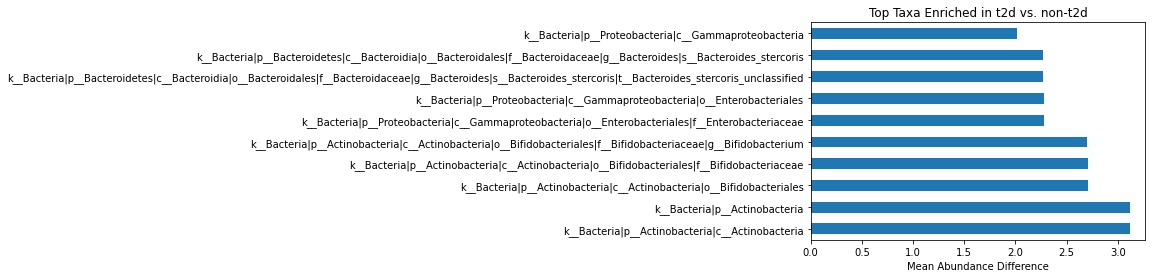

In [8]:
# all taxa columns
taxa_cols = [col for col in df.columns if col.startswith('k_')]

# compute group-wise means
group_means = df.groupby('t2d_label')[taxa_cols].mean().T

# compute difference in mean abundance between t2d and non-t2d
group_means['diff'] = group_means['t2d'] - group_means['non_t2d']

# top 10 taxa most enriched in t2d
top_t2d_taxa = group_means['diff'].sort_values(ascending=False).head(10)

# visualize
top_t2d_taxa.plot(kind='barh')
plt.title('Top Taxa Enriched in t2d vs. non-t2d')
plt.xlabel('Mean Abundance Difference')

Text(0.5, 0, 'Mean Abundance Difference')

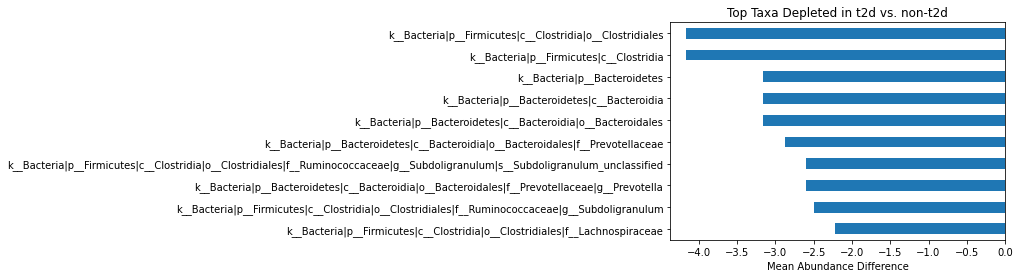

In [9]:
# top 10 taxa most depleted in t2d
tail_t2d_taxa = group_means['diff'].sort_values(ascending=False).tail(10)

# visualize
tail_t2d_taxa.plot(kind='barh')
plt.title('Top Taxa Depleted in t2d vs. non-t2d')
plt.xlabel('Mean Abundance Difference')

## Identify the Most Robust Taxa: Mann-Whitney U tests 

In [10]:
from scipy.stats import mannwhitneyu

pvals = {}
for taxon in taxa_cols:
    group1 = df[df['t2d_label'] == 't2d'][taxon]
    group2 = df[df['t2d_label'] == 'non_t2d'][taxon]
    
    # skip taxa with no variation
    if group1.nunique() < 2 or group2.nunique() < 2:
        continue
    
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    pvals[taxon] = p

# create DataFrame
pval_df = pd.DataFrame.from_dict(pvals, orient='index', columns=['pval'])


## Adjust for Multiple Testing (FDR Correction)

In [11]:
from statsmodels.stats.multitest import multipletests

pval_df['pval_adj'] = multipletests(pval_df['pval'], method='fdr_bh')[1]
pval_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1286 entries, k__Archaea to k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Alteromonadales|f__Pseudoalteromonadaceae|g__Pseudoalteromonas|s__Pseudoalteromonas_undina|t__GCF_000238275
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pval      1286 non-null   float64
 1   pval_adj  1286 non-null   float64
dtypes: float64(2)
memory usage: 30.1+ KB


In [12]:
# append p_value results to group_means
results = pval_df.join(group_means['diff'])
results

,pval,pval_adj,diff
k__Archaea,0.000208,0.001105,-0.285286
k__Archaea|p__Euryarchaeota,0.000208,0.001105,-0.285286
k__Archaea|p__Euryarchaeota|c__Methanobacteria,0.000169,0.000919,-0.285298
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,0.000169,0.000919,-0.285298
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,0.000169,0.000919,-0.285298
...,...,...,...
k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Alteromonadales|f__Pseudoalteromonadaceae|g__Pseudoalteromonas,0.000061,0.000374,0.000041
k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Alteromonadales|f__Pseudoalteromonadaceae|g__Pseudoalteromonas|s__Pseudoalteromonas_haloplanktis,0.000061,0.000374,0.000017
k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Alteromonadales|f__Pseudoalteromonadaceae|g__Pseudoalteromonas|s__Pseudoalteromonas_haloplanktis|t__Pseudoalteromonas_haloplanktis_unclassified,0.000061,0.000374,0.000017
k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Alteromonadales|f__Pseudoalteromonadaceae|g__Pseudoalteromonas|s__Pseudoalteromonas_undina,0.002526,0.009414,0.000023


## Filter for Statistically Significant & Biologically Meaningful Taxa

check the distribution of 'diff' among the significant taxa to determine the cutoff:

In [13]:
sig_taxa = results[(results['pval_adj'] < 0.05)]
sig_taxa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, k__Archaea to k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Alteromonadales|f__Pseudoalteromonadaceae|g__Pseudoalteromonas|s__Pseudoalteromonas_undina|t__GCF_000238275
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pval      466 non-null    float64
 1   pval_adj  466 non-null    float64
 2   diff      466 non-null    float64
dtypes: float64(3)
memory usage: 14.6+ KB


<Axes: >

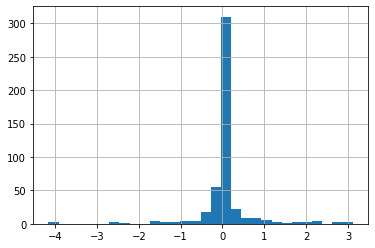

In [14]:
sig_taxa['diff'].hist(bins=30)

threshold of |0.5| seems reasonable for mean difference:

In [15]:
threshold = 0.5
sig_taxa = results[(results['pval_adj'] < 0.05) & (results['diff'].abs() > threshold)]

sig_taxa_enriched = sig_taxa.sort_values('diff', ascending=False)
sig_taxa_depleted = sig_taxa.sort_values('diff', ascending=True)

## Visualize Top Enriched vs Depleted Taxa

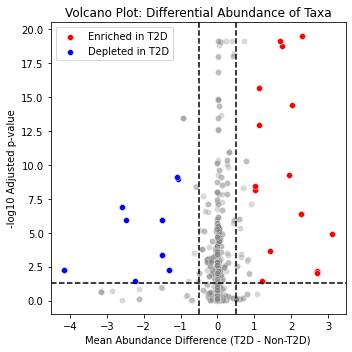

In [24]:
plt.figure(figsize=(5,5))

# all points
sns.scatterplot(data=results, x='diff', y=-np.log10(results['pval_adj']), color='gray', alpha=0.3)

# high enriched
highlight_pos = sig_taxa[sig_taxa['diff'] > 1]
sns.scatterplot(data=highlight_pos, x='diff', y=-np.log10(highlight_pos['pval_adj']), color='red', label='Enriched in T2D')

# high depleted
highlight_neg = sig_taxa[sig_taxa['diff'] < -1]
sns.scatterplot(data=highlight_neg, x='diff', y=-np.log10(highlight_neg['pval_adj']), color='blue', label='Depleted in T2D')

# threshold lines
plt.axhline(-np.log10(0.05), color='black', linestyle='--')
plt.axvline(-0.5, color='black', linestyle='--')
plt.axvline(0.5, color='black', linestyle='--')

plt.xlabel("Mean Abundance Difference (T2D - Non-T2D)")
plt.ylabel("-log10 Adjusted p-value")
plt.title("Volcano Plot: Differential Abundance of Taxa")
plt.legend()
plt.tight_layout()

In [31]:
import os

# ensure the 'processed' directory exists
processed_dir = '../data/processed/'
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# save the cleaned DataFrames 
enriched_taxa_path = os.path.join(processed_dir, 'enriched_taxa_df.csv')
depleted_taxa_path = os.path.join(processed_dir, 'depleted_taxa_df.csv')

highlight_pos.to_csv(enriched_taxa_path)
highlight_neg.to_csv(depleted_taxa_path)

print(f"T2D enriched taxa df saved to {enriched_taxa_path}")
print(f"T2D depleted taxa df saved to {depleted_taxa_path}")

T2D enriched taxa df saved to ../data/processed/enriched_taxa_df.csv
T2D depleted taxa df saved to ../data/processed/depleted_taxa_df.csv


## Visualize Correlation Matrix for Any Signs of Multicollinearity

Text(0.5, 1.0, 'Correlation Heatmap of Top 20 Taxa')

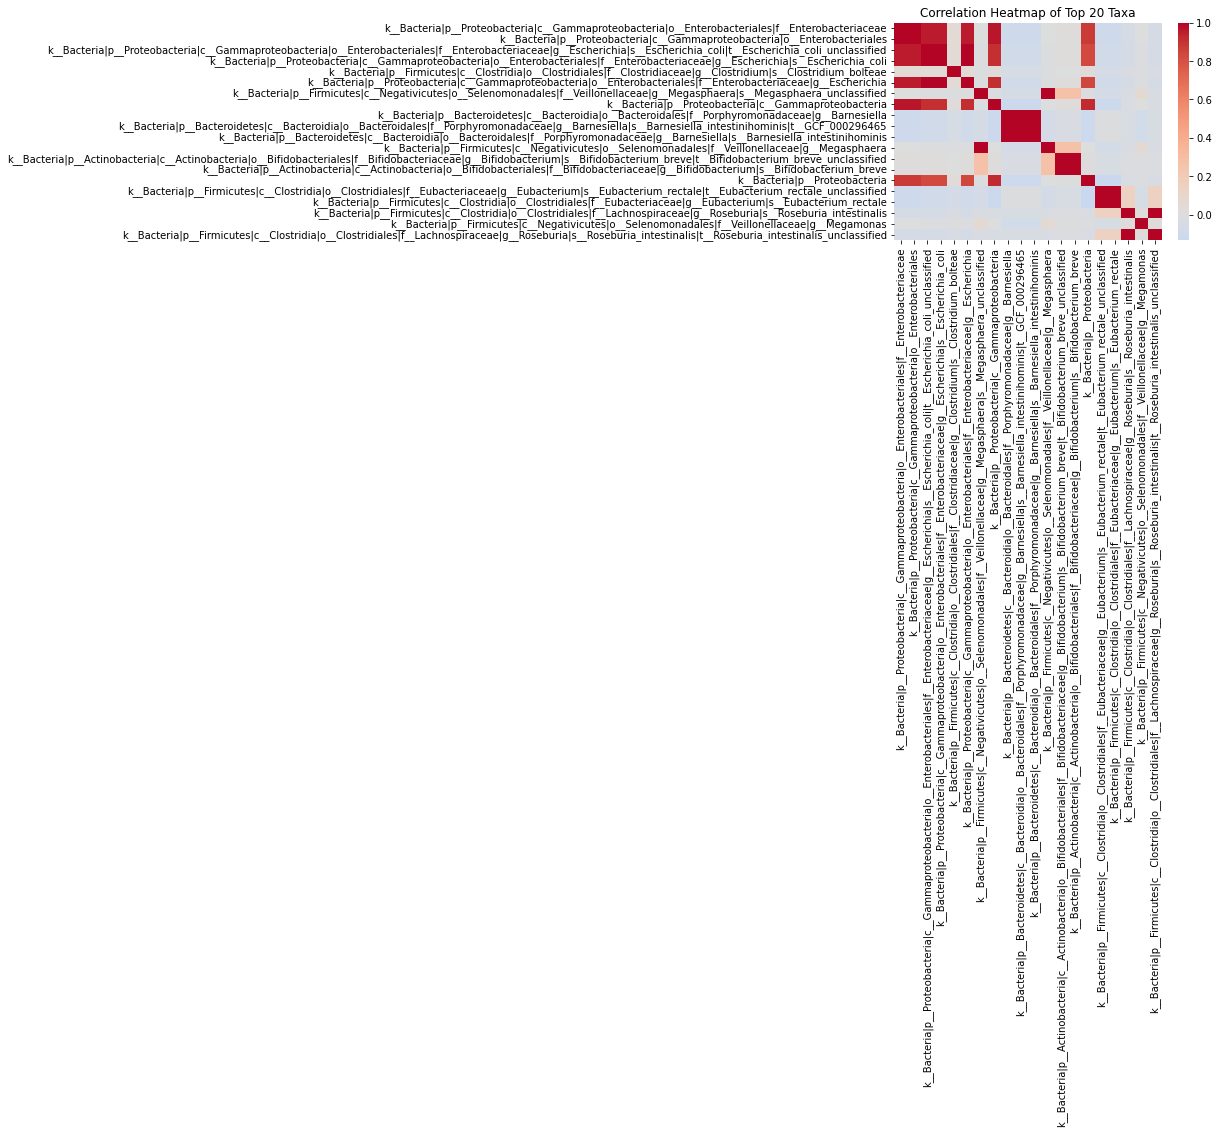

In [ ]:
top_taxa = sig_taxa.sort_values('pval_adj').head(20).index
sns.heatmap(df[top_taxa].corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top 20 Taxa')

## Sample Metadata Exploration

#### Age distribution by T2D status

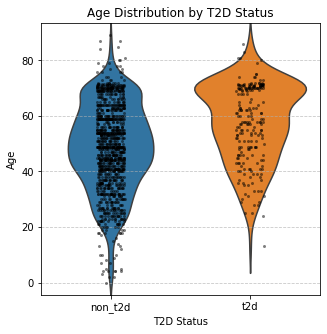

In [ ]:
# drop missing ages
metadata_age = metadata_df.dropna(subset=['age'])

plt.figure(figsize=(5,5))

# violin plot
sns.violinplot(x='t2d_label', y='age', data=metadata_age, inner=None)

# individual datapoints
sns.stripplot(x='t2d_label', y='age', data=metadata_age, color='black', size=3, jitter=True, alpha=0.5)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Age Distribution by T2D Status')
plt.xlabel('T2D Status')
plt.ylabel('Age')
plt.show()


The violin plot shows that T2D samples are generally older than Non-T2D samples, with peak sample density around 65–70 years old in the T2D group. This is consistent with epidemiological expectations for Type 2 Diabetes incidence increasing with age.

#### Gender distribution by T2D status

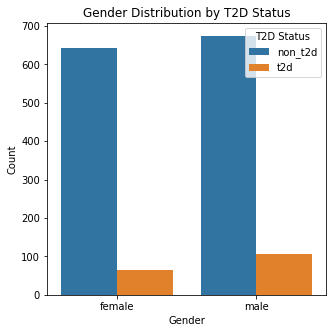

In [68]:
# drop missing genders
metadata_gender = metadata_df.dropna(subset=['gender'])

# countplot
plt.figure(figsize=(5,5))
sns.countplot(x='gender', hue='t2d_label', data=metadata_gender)
plt.title('Gender Distribution by T2D Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='T2D Status')
plt.show()


- Non-T2D samples are roughly evenly split between males and females. T2D samples show a slight skew toward males.
- Gender could be a minor confounding factor in disease classification, but the overall class balance remains acceptable.

#### Country distribution by T2D status

country
china         576
denmark       514
spain         258
usa           174
france        135
sweden        130
germany        56
peru           29
tanzania       27
italy          11
yugoslavia      2
norway          1
slovakia        1
hungary         1
estonia         1
finland         1
iceland         1
Name: count, dtype: int64


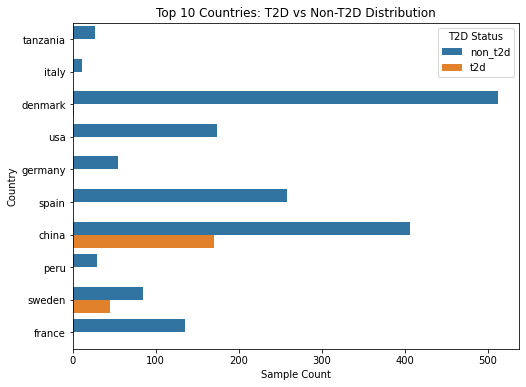

In [ ]:
# drop missing countries if needed
metadata_country = metadata_df.dropna(subset=['country'])

# quick look at how many countries there are in the dataset
print(metadata_country['country'].value_counts())

# limit to top 10 countries for visualization
top_countries = metadata_country['country'].value_counts().head(10).index

# plot
plt.figure(figsize=(6,6))
sns.countplot(data=metadata_country[metadata_country['country'].isin(top_countries)], 
              y='country', hue='t2d_label')
plt.title('Top 10 Countries: T2D vs Non-T2D Distribution')
plt.xlabel('Sample Count')
plt.ylabel('Country')
plt.legend(title='T2D Status')
plt.show()

The majority of the T2D samples in this dataset come from China and Sweden. 